# SalesPrice Prediction for House

Exercise from Kaggle

Features ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Prepare Data

In [5]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

Preprocessing Data

In [42]:
# To view the Training file details
train_data.describe(include='all')
# train_data.columns

# To view the Test file details
# test_data.describe(include='all')
# test_data.columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [44]:
# Dropping the columns with more than 95% missing values

# train_data['MSZoning'].unique()
# train_data.isnull().sum()

train_data_nonull = train_data.dropna(thresh=0.95*len(train_data), axis='columns')
#train_data.Alley

In [60]:
train_data_nonull.describe()

# remaining 70 columns from original 81 after removing those with the NaN >95%

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [47]:
train_data_nonull.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Y

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

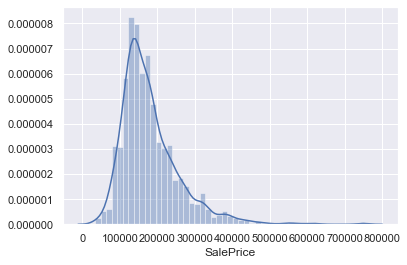

In [59]:
sns.distplot(train_data_nonull['SalePrice']);

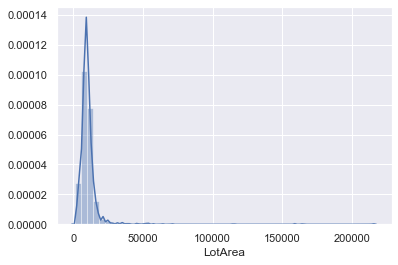

In [61]:
# Before removing extreme values
sns.distplot(train_data_nonull['LotArea']);

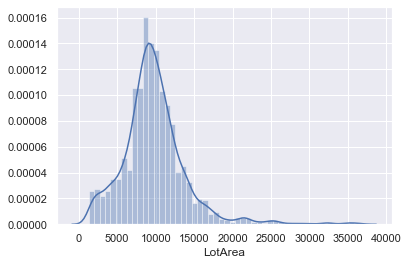

In [71]:
# Removing the extreme values
q = train_data_nonull['LotArea'].quantile(0.99)
train_data_nonull_LA  = train_data_nonull[train_data_nonull['LotArea']<q]

# Plotting the new distribution
sns.distplot(train_data_nonull_LA['LotArea']);

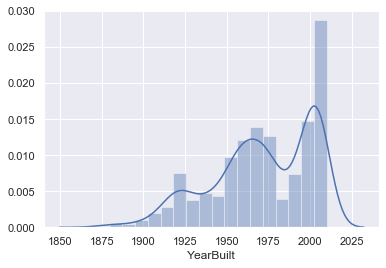

In [62]:
# Before removing extreme values. It seems okay.
sns.distplot(train_data_nonull['YearBuilt']);

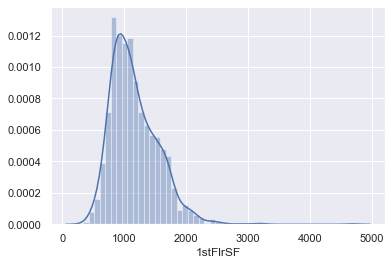

In [63]:
# Before removing extreme values
sns.distplot(train_data_nonull['1stFlrSF']);

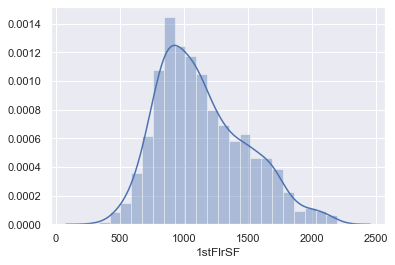

In [74]:
# Removing the extreme values
q = train_data_nonull_LA['1stFlrSF'].quantile(0.99)
train_data_nonull_LA_1F = train_data_nonull_LA[train_data_nonull_LA['1stFlrSF']<q]

# Plotting after removing extreme values
sns.distplot(train_data_nonull_LA_1F['1stFlrSF']);

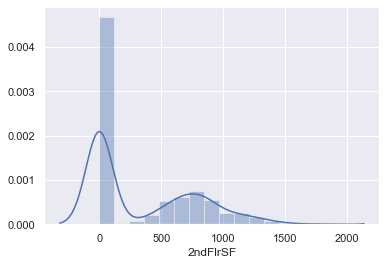

In [79]:
sns.distplot(train_data_nonull_LA_1F['2ndFlrSF']);

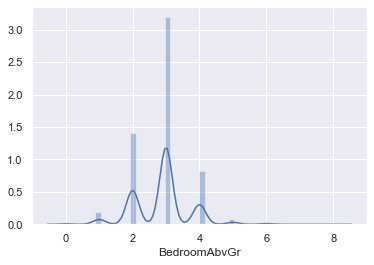

In [80]:
sns.distplot(train_data_nonull_LA_1F['BedroomAbvGr']);

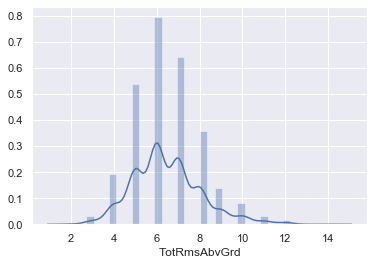

In [81]:
sns.distplot(train_data_nonull_LA_1F['TotRmsAbvGrd']);

In [82]:
train_data_processed=train_data_nonull_LA_1F

Text(0.5, 1.0, '2ndFlrSF vs SalePrice')

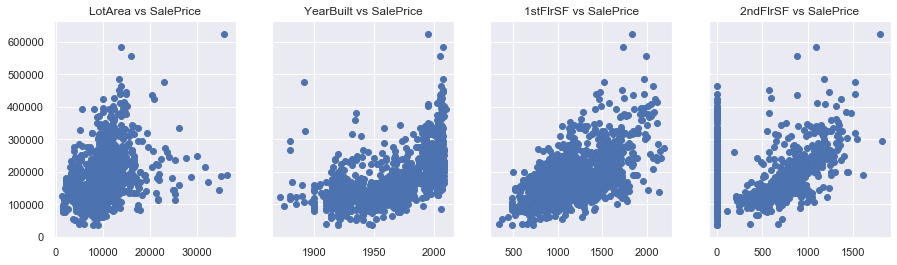

In [87]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,4)) 
ax1.scatter(train_data_processed['LotArea'],train_data_processed['SalePrice'])
ax1.set_title('LotArea vs SalePrice')
ax2.scatter(train_data_processed['YearBuilt'],train_data_processed['SalePrice'])
ax2.set_title('YearBuilt vs SalePrice')
ax3.scatter(train_data_processed['1stFlrSF'],train_data_processed['SalePrice'])
ax3.set_title('1stFlrSF vs SalePrice')
ax4.scatter(train_data_processed['2ndFlrSF'],train_data_processed['SalePrice'])
ax4.set_title('2ndFlrSF vs SalePrice')

In [90]:
# Processed data
train_data_processed.describe(include='all')

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1430.000000,1430.000000,1430,1430.000000,1430,1430,1430,1430,1430,1430,...,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430,1430,1430.000000
unique,NaN,NaN,5,NaN,2,4,4,2,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1121,NaN,1425,919,1296,1429,1037,1363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1243,1176,NaN
mean,733.265734,57.314685,NaN,9705.240559,NaN,NaN,NaN,NaN,NaN,NaN,...,21.780420,3.481119,14.832168,2.093007,43.562238,6.327972,2007.813287,NaN,NaN,177446.767832
std,421.725197,42.369368,NaN,4166.203638,NaN,NaN,NaN,NaN,NaN,NaN,...,60.792348,29.619266,55.480935,35.703121,500.820216,2.700748,1.330891,NaN,NaN,72859.565323
min,1.000000,20.000000,NaN,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,368.250000,20.000000,NaN,7500.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,129500.000000
50%,735.500000,50.000000,NaN,9375.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,161000.000000
75%,1098.750000,70.000000,NaN,11412.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,210000.000000


In [92]:
train_data_processed.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [103]:
train_data_processed.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSo

In [109]:
train_data_processed['TotRmsAbvGrd'].head()

0    8
1    6
2    6
3    7
4    9
Name: TotRmsAbvGrd, dtype: int64

In [104]:
# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [119]:
# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = train_data_processed[['LotArea', 'YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr']]#,'TotRmsAbvGrd']]
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

vif

,VIF,Features
0,8.281124,LotArea
1,23.449074,YearBuilt
2,22.451332,1stFlrSF
3,3.441640,2ndFlrSF
4,16.082149,FullBath
5,20.164362,BedroomAbvGr


In [120]:
train_data_processed_dummies =pd.get_dummies(train_data_processed, drop_first=True)

In [121]:
train_data_processed_dummies.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


   # TEST TRAIN SPLIT

In [122]:
# Assign the y <- Prediction variable, and X <- Predicting features
# X is assigned 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
# X = train_data[features]
# y = train_data.SalePrice

X = train_data_processed_dummies[features]
y = train_data_processed_dummies.SalePrice

In [123]:
# Splitting the Testing into test+validation data
train_X, val_X, train_y, val_y =train_test_split(X,y, random_state=1)

# Model Setup

In [124]:
# Import Random Forest Regressor (RFR) from sklearn
from sklearn.ensemble import RandomForestRegressor

In [125]:
# Instantize the RFR model, and assign random_state as 1
model = RandomForestRegressor(random_state=1)

# Model Fit

In [126]:
# Fitting the model with train features (train_X) and predicted sales price (train_y)
model.fit(train_X, train_y)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

# Model Predict

In [127]:
# Now predicting the fit / trained model with the validation data (val_X)
preds = model.predict(val_X)

In [128]:
# To check the error from each value we import the mean absolute error function 
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error

In [129]:
#check mean absolute error between the valudation y and predicted val_x
mae = mean_absolute_error(preds, val_y)
print("Validation MAE for Random Forest Model: {:,.0f}".format(mae))
# Validation MAE for Random Forest Model: 22,762

Validation MAE for Random Forest Model: 22,418


# Adjusting the Hyper Parameters

In [65]:
# Defining the Functino that setup, fit and predicts also returns the mae 
# ..with n_estimator HYPER PARAMETER 
# def get_mae(n_e, m_d, m_l_n, train_X, val_X, train_y, val_y):
#    model = RandomForestRegressor(n_estimators=n_e, max_depth=m_d, max_leaf_nodes=m_l_n, random_state=0)
#    model.fit(train_X, train_y)
#    preds_val = model.predict(val_X)
#    mae = mean_absolute_error(val_y, preds_val)
#    return(mae)

In [73]:
# Trigger
# temp_mae =99999
# for n_e in [10, 50, 100, 300, 400, 500]:         # Default 100
#    for m_d in [1,10,100]:                       # Default NONE
#        for m_l_n in [100, 200, 300, 400, 500]:  # Default NONE
#            my_mae = get_mae(n_e, m_d, m_l_n, train_X, val_X, train_y, val_y)
#            print("No. of Estimators: %d\tMax_Depth: %d\tMax_Leaf_Nodes: %d\tMean Absolute Error:  %d" %(n_e, m_d, m_l_n, my_mae))
#            if my_mae < temp_mae:
#                temp_mae = my_mae
#                temp_n_e = n_e
#                temp_m_d = m_d
#                temp_m_l_n = m_l_n
                
# print('The lowest MAE of %d, found at n_e %d, m_d %d, m_l_n %d,' %(temp_mae, temp_n_e, temp_m_d, temp_m_l_n,))
# The lowest MAE of 21987, found at n_e 300, m_d 100, m_l_n 300,

# For the Kaggle Competition TEST

Create a New model and run on the entire test data set

In [130]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X,y)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [37]:
# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_X = test_data[features]

# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_X)

# The lines below shows how to save predictions in format used for competition scoring
# Just uncomment them.

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

In [26]:
output.head()

,Id,SalePrice
0,1461,112945.0
1,1462,149770.0
2,1463,178100.0
3,1464,177950.0
4,1465,189000.0
